# Data Preparation

I am working with the Astronomy Stack Exchange forum dataset, which is quite large. Due to its size, I am unable to use pd.read_xml directly for processing the XML files. Instead, I have opted to use a more manual approach by parsing the XML files using ElementTree and extracting the relevant data into a pandas DataFrame.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import os
import xml.etree.ElementTree as ET

In [2]:
def parse_xml(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    data = [child.attrib for child in root]
    return pd.DataFrame(data)

def columns_to_numeric(df, columns):
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

def columns_to_datetime(df, columns):
    for col in columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

In [3]:
current_dir = os.getcwd()
dataset_dir = os.path.join(current_dir, 'astronomy.stackexchange.com')
badges_path = os.path.join(dataset_dir, 'Badges.xml')
comments_path = os.path.join(dataset_dir, 'Comments.xml')
posthistory_path = os.path.join(dataset_dir, 'PostHistory.xml')
postlinks_path = os.path.join(dataset_dir, 'PostLinks.xml')
posts_path = os.path.join(dataset_dir, 'Posts.xml')
tags_path = os.path.join(dataset_dir, 'Tags.xml')
users_path = os.path.join(dataset_dir, 'Users.xml')
votes_path = os.path.join(dataset_dir, 'Votes.xml')

badges_df = parse_xml(badges_path)
comments_df = parse_xml(comments_path)
posthistory_df = parse_xml(posthistory_path)
postlinks_df = parse_xml(postlinks_path)
posts_df = parse_xml(posts_path)
tags_df = parse_xml(tags_path)
users_df = parse_xml(users_path)
votes_df = parse_xml(votes_path)

In [4]:
print(badges_df.dtypes)
print(badges_df)

Id          object
UserId      object
Name        object
Date        object
Class       object
TagBased    object
dtype: object
          Id UserId                Name                     Date Class  \
0         65     13             Teacher  2013-09-24T19:45:31.307     3   
1         66     28             Teacher  2013-09-24T19:45:31.307     3   
2         79     31             Teacher  2013-09-24T19:55:31.313     3   
3         82     43             Teacher  2013-09-24T20:00:33.520     3   
4         96      7             Teacher  2013-09-24T20:20:35.147     3   
...      ...    ...                 ...                      ...   ...   
64717  75482   2531        neutron-star  2023-03-02T04:00:00.317     2   
64718  76897   2365  apparent-magnitude  2023-05-26T04:00:00.283     3   
64719  79079   2365     space-telescope  2023-10-02T04:00:50.790     3   
64720  81362   2365         moon-phases  2023-12-22T04:01:42.017     3   
64721  81543   2531           radiation  2024-01-04T04:01:

The data from the XML file is currently stored as objects. In the next steps, I will focus on identifying and converting columns that should be numerical or contain datetime values. This will help ensure the data is correctly formatted for analysis.

In [5]:
badges_numeric_cols = ['Id', 'UserId', 'Class']
comments_numeric_cols = ['Id', 'PostId', 'Score', 'UserId']
posthistory_numeric_cols = ['Id', 'PostHistoryTypeId', 'PostId', 'UserId']
postlinks_numeric_cols = ['Id', 'PostId', 'RelatedPostId', 'LinkTypeId']
posts_numeric_cols = ['Id', 'PostTypeId', 'AcceptedAnswerId', 'Score', 'ViewCount', 'OwnerUserId', 'AnswerCount', 'CommentCount', 'ParentId', 'FavoriteCount']
tags_numeric_cols = ['Id', 'Count', 'ExcerptPostId', 'WikiPostId']
users_numeric_cols = ['Id', 'Reputation', 'Views', 'UpVotes', 'DownVotes', 'AccountId']
votes_numeric_cols = ['Id', 'PostId', 'VoteTypeId', 'UserId', 'BountyAmount']

badges_df = columns_to_numeric(badges_df, badges_numeric_cols)
comments_df = columns_to_numeric(comments_df, comments_numeric_cols)
posthistory_df = columns_to_numeric(posthistory_df, posthistory_numeric_cols)
postlinks_df = columns_to_numeric(postlinks_df, postlinks_numeric_cols)
posts_df = columns_to_numeric(posts_df, posts_numeric_cols)
tags_df = columns_to_numeric(tags_df, tags_numeric_cols)
users_df = columns_to_numeric(users_df, users_numeric_cols)
votes_df = columns_to_numeric(votes_df, votes_numeric_cols)

In [6]:
badges_datetime_cols = ['Date']
comments_datetime_cols = ['CreationDate']
posthistory_datetime_cols = ['CreationDate']
postlinks_datetime_cols = ['CreationDate']
posts_datetime_cols = ['CreationDate', 'LastEditDate', 'LastActivityDate', 'ClosedDate', 'CommunityOwnedDate']
users_datetime_cols = ['CreationDate', 'LastAccessDate']
votes_datetime_cols = ['CreationDate']

badges_df = columns_to_datetime(badges_df, badges_datetime_cols)
comments_df = columns_to_datetime(comments_df, comments_datetime_cols)
posthistory_df = columns_to_datetime(posthistory_df, posthistory_datetime_cols)
postlinks_df = columns_to_datetime(postlinks_df, postlinks_datetime_cols)
posts_df = columns_to_datetime(posts_df, posts_datetime_cols)
users_df = columns_to_datetime(users_df, users_datetime_cols)
votes_df = columns_to_datetime(votes_df, votes_datetime_cols)

# Task 1

Based on the data from the selected forum, in programming language of your choice (R or Python) prepare the following charts:

1. Histogram;
2. Box-and-whiskers plot;
3. Bar chart;
4. Heatmap;
5. Line or bubble chart;

Make sure that resulting plots are aesthetically pleasing and clear to read. To each chart add a caption / brief description of what it represents.

For example, you may consider the posts score and prepare the histogram with density function estimation added. You may then plot the box-and-whiskers plots of score when divided by the post type, etc.


## Histogram of Post Scores

Displayed Scores Range: -13.00 to 177.00


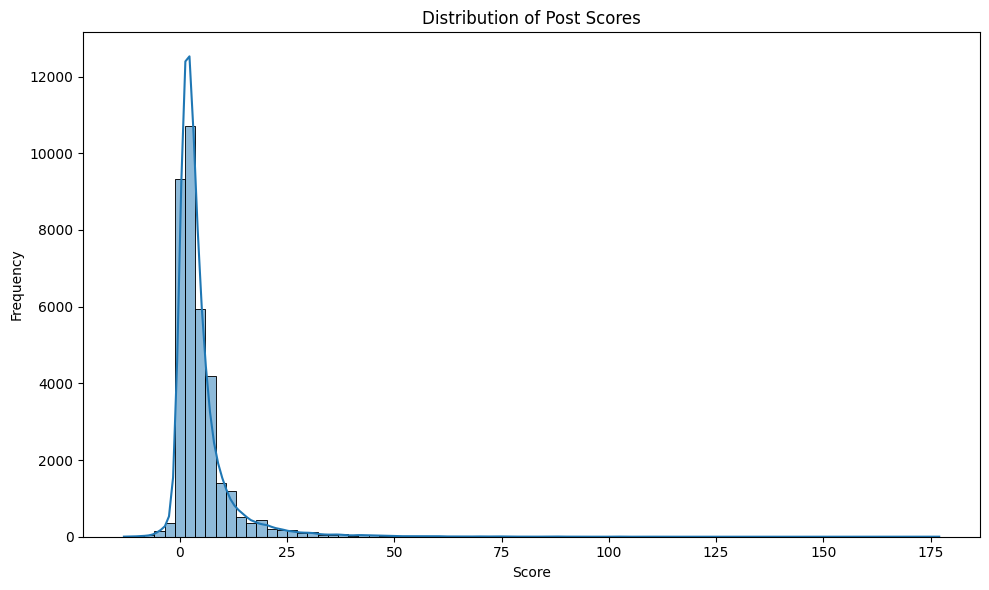

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(posts_df['Score'].dropna(), kde=True, bins=80)
plt.title('Distribution of Post Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

print(f"Displayed Scores Range: {posts_df['Score'].min():.2f} to {posts_df['Score'].max():.2f}")

plt.tight_layout()
plt.show()

It is observed that most posts are ignored, their scores being around 0. This suggests that posts with the maximum score might contain essential information from specialists.
A notable observation is that -13 appears as a significant minimum value.

This graph contains a lot of outliers. To improve the analysis, I plan to remove these outliers using the Interquartile Range (IQR) method.

Displayed Scores Range: -6.50 to 13.50


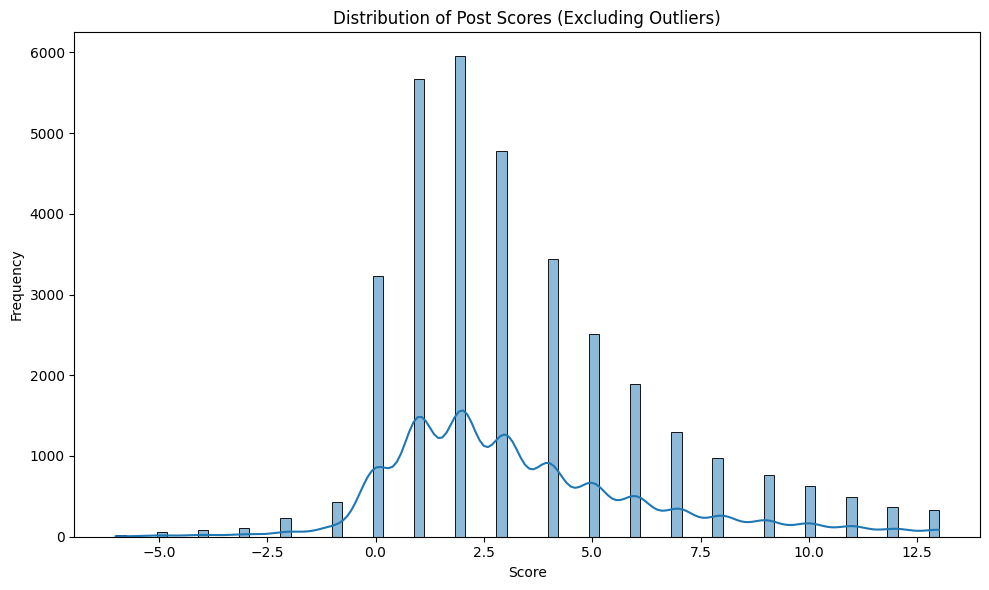

In [8]:
Q1 = posts_df['Score'].quantile(0.25)
Q3 = posts_df['Score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

no_outliers_scores1 = posts_df[(posts_df['Score'] >= lower_bound) & (posts_df['Score'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.histplot(no_outliers_scores1['Score'].dropna(), kde=True, bins=80)
plt.title('Distribution of Post Scores (Excluding Outliers)')
plt.xlabel('Score')
plt.ylabel('Frequency')

print(f"Displayed Scores Range: {lower_bound:.2f} to {upper_bound:.2f}")

plt.tight_layout()
plt.show()

I believe the IQR method removed too many data points, so I decided to adjust the outlier removal approach. Instead of using IQR, I now define the lower and upper bounds using the 1st and 99th percentiles:

Displayed Scores Range: -2.00 to 36.00


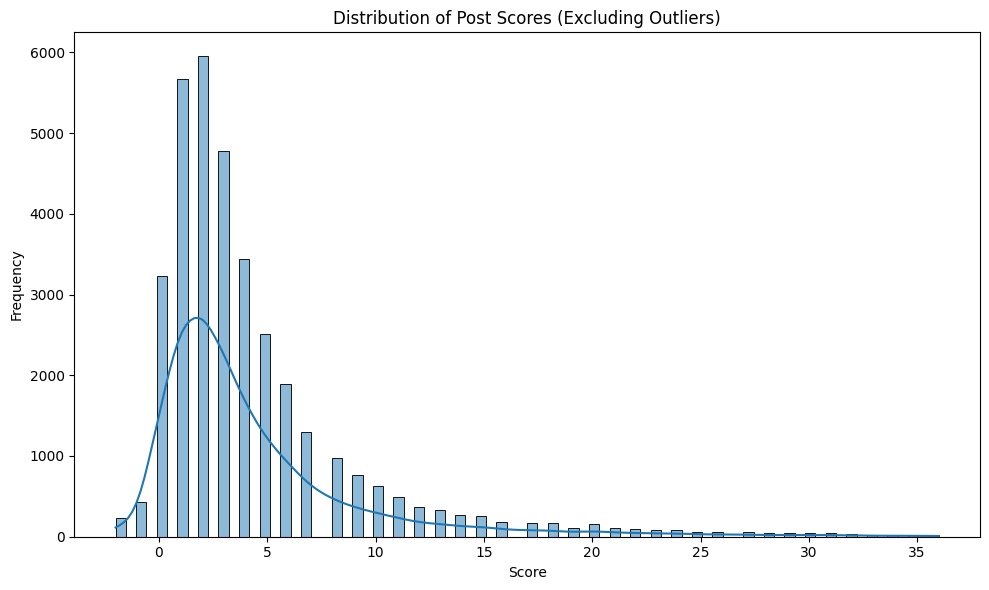

In [9]:
lower_bound = posts_df['Score'].quantile(0.01)
upper_bound = posts_df['Score'].quantile(0.99)

no_outliers_scores = posts_df[(posts_df['Score'] >= lower_bound) & (posts_df['Score'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.histplot(no_outliers_scores['Score'].dropna(), kde=True, bins=80)
plt.title('Distribution of Post Scores (Excluding Outliers)')
plt.xlabel('Score')
plt.ylabel('Frequency')

print(f"Displayed Scores Range: {lower_bound:.2f} to {upper_bound:.2f}")

plt.tight_layout()
plt.show()


## Box-and-Whiskers Plot of Scores by Post Type

The data was initially difficult to interpret, but fortunately, we can remove outliers simply by setting the showfliers parameter to False when using IQR.
The Score is generally non-zero only for specific post types like Questions, Answers, and Moderator Nominations (https://meta.stackexchange.com/questions/2677/database-schema-documentation-for-the-public-data-dump-and-sede/2678#2678). As a result, I decided to remove post types 4, 5, and 7, as they don't contribute meaningfully to the analysis. In the final version, I also excluded type 6, as it consistently had a value of zero, providing no informative statistics.


Additionally, I mapped the post type ids to their names for easier interpretation.

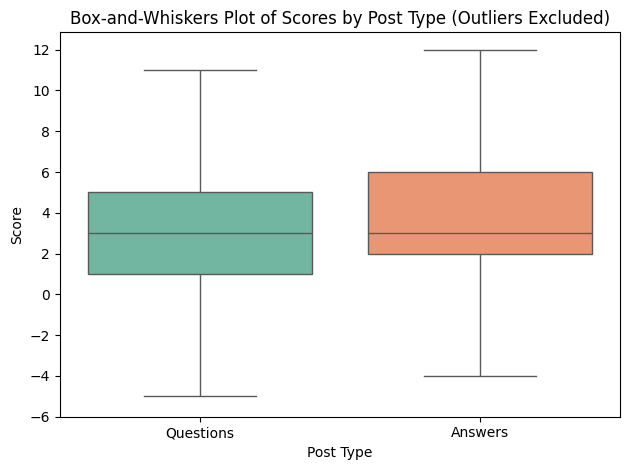

In [10]:
scoreable_post_types = posts_df[~posts_df["PostTypeId"].isin([4, 5, 6, 7])].copy()

post_types_names = {1: "Questions", 2: "Answers"}

scoreable_post_types["PostTypeId"] = scoreable_post_types["PostTypeId"].map(post_types_names)

sns.boxplot(data=scoreable_post_types, x="PostTypeId", y="Score", hue="PostTypeId", palette="Set2", legend=False, showfliers=False)
plt.title("Box-and-Whiskers Plot of Scores by Post Type (Outliers Excluded)")
plt.xlabel("Post Type")
plt.ylabel("Score")

y_min, y_max = plt.gca().get_ylim()
plt.yticks(np.arange(np.floor(y_min), np.ceil(y_max) + 1, 2))

plt.tight_layout()
plt.show()

The median score is the same for both "Questions" and "Answers" (3), but the "Answers" box is higher on the score scale overall. This suggests that answers tend to have higher scores than questions, despite the same median. However, the range and interquartile spread are equal too, which is also interesting.

## Line Chart of User Growth and Decline Over Time

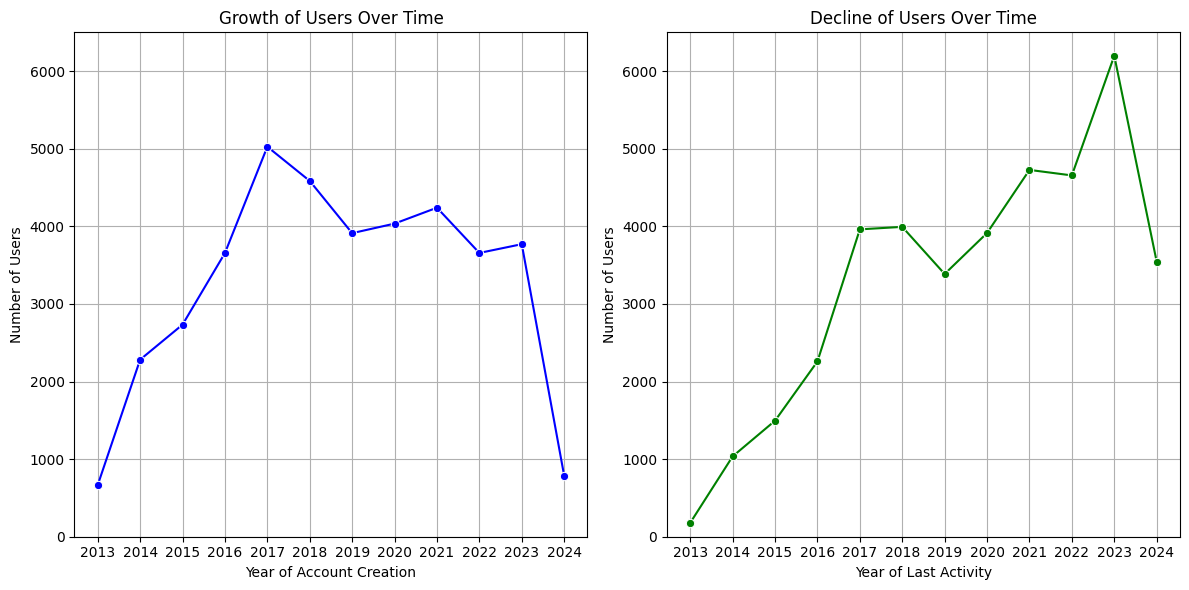

In [11]:
users_df['CreationYear'] = users_df['CreationDate'].dt.year
users_df['LastAccessYear'] = users_df['LastAccessDate'].dt.year

user_growth_by_year = users_df.groupby('CreationYear').size().reset_index(name='UserCount')
user_decline_by_year = users_df.groupby('LastAccessYear').size().reset_index(name='UserCount')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x='CreationYear', y='UserCount', data=user_growth_by_year, marker='o', color='blue')
plt.title('Growth of Users Over Time')
plt.xlabel('Year of Account Creation')
plt.ylabel('Number of Users')
plt.locator_params(axis='x', nbins=13)
plt.ylim(0, 6500)
plt.grid(True)

plt.subplot(1, 2, 2)
sns.lineplot(x='LastAccessYear', y='UserCount', data=user_decline_by_year, marker='o', color='green')
plt.title('Decline of Users Over Time')
plt.xlabel('Year of Last Activity')
plt.ylabel('Number of Users')
plt.locator_params(axis='x', nbins=13)
plt.ylim(0, 6500)
plt.grid(True)

plt.tight_layout()
plt.show()

Since 2021, the decline in user activity has exceeded the growth, possibly indicating lost of interest in the topic of the forum. It is important to note that data for 2024 is not complete, as the database was uploaded in mid-2024.

## Bar Chart of Top 20 Most Awarded Badges

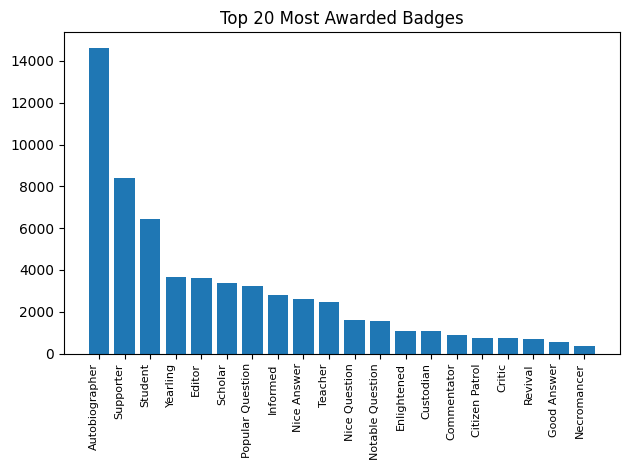

In [12]:
badges_by_name = badges_df.groupby('Name').size().reset_index(name='BadgesCount')

top_n = 20
top_badges = badges_by_name.sort_values('BadgesCount', ascending=False).head(top_n)

plt.bar(top_badges["Name"], top_badges["BadgesCount"])
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.title('Top 20 Most Awarded Badges')
plt.tight_layout()
plt.show()

The top three badges:

1. Autobiographer: Complete "About Me" section of user profile.
2. Supporter: First up vote.
3. Student: First question with score of 1 or more.

It show that users are usually quick to fill out their profiles first. After that, they tend to upvote others' posts and then ask their own questions.

## Correlation Heatmap of User Metrics

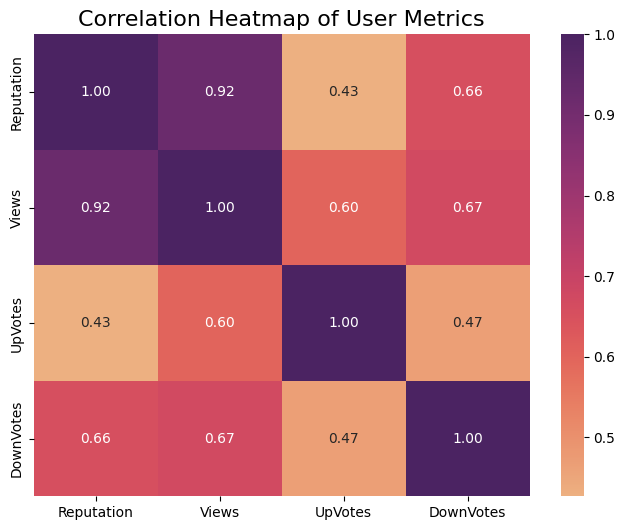

In [13]:
user_metrics_df = users_df[['Reputation', 'Views', 'UpVotes', 'DownVotes']].dropna()
correlation_matrix = user_metrics_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt='.2f')
plt.title("Correlation Heatmap of User Metrics", fontsize=16)
plt.show()

Votes are cast by the user, not for them. The correlation between views and upvotes (0.60) is interesting because it suggests that users who are positively active in interacting with others' posts tend to have their profiles viewed more often.

The really high views-reputation correlation (0.92) is expected, as I would anticipate that active users are likely to explore the profiles of reputable accounts. The relatively low correlation between upvotes and reputation (0.43) is also interesting, as it could imply that some reputable users might not be very active in upvoting others. However, they are still active enough to help correct mistakes, which aligns with the correlation between downvotes and reputation (0.66).

The views-upvotes (0.60) and views-downvotes (0.67) correlations are fairly predictable, as it makes sense to check the account of someone who voted on your post. The relatively low correlation between upvotes and downvotes (0.47) suggests that users may tend to take a side (either as the "nice guy" or the "strict guy") or the forum may have been subject to troll attacks.

# Task 2

Use ChatGPT to prepare any chart you want based on the data corresponding to your selected forum
(i.e. choose a topic that you find interesting). Then, based on the code suggested by ChatGPT (you can choose whether it should be in R or Python), create the aforementioned plot. The main part of this task is to
analyze the solution provided by ChatGPT. Describe what the chart presents, its strengths and weaknesses,
whether it is readable, what could be improved, etc. In in your submission include following:

1. You query to chatGPT;
2. Code generated by ChatGPT and figure created with it;
3. Your analysis of obtained solution.
   
Please remember: the more interesting figure, the better!

## Query: Generate Python code to plot a stacked bar chart, where the x-axis represents year-month, and the y-axis shows the count of badges by badge name.

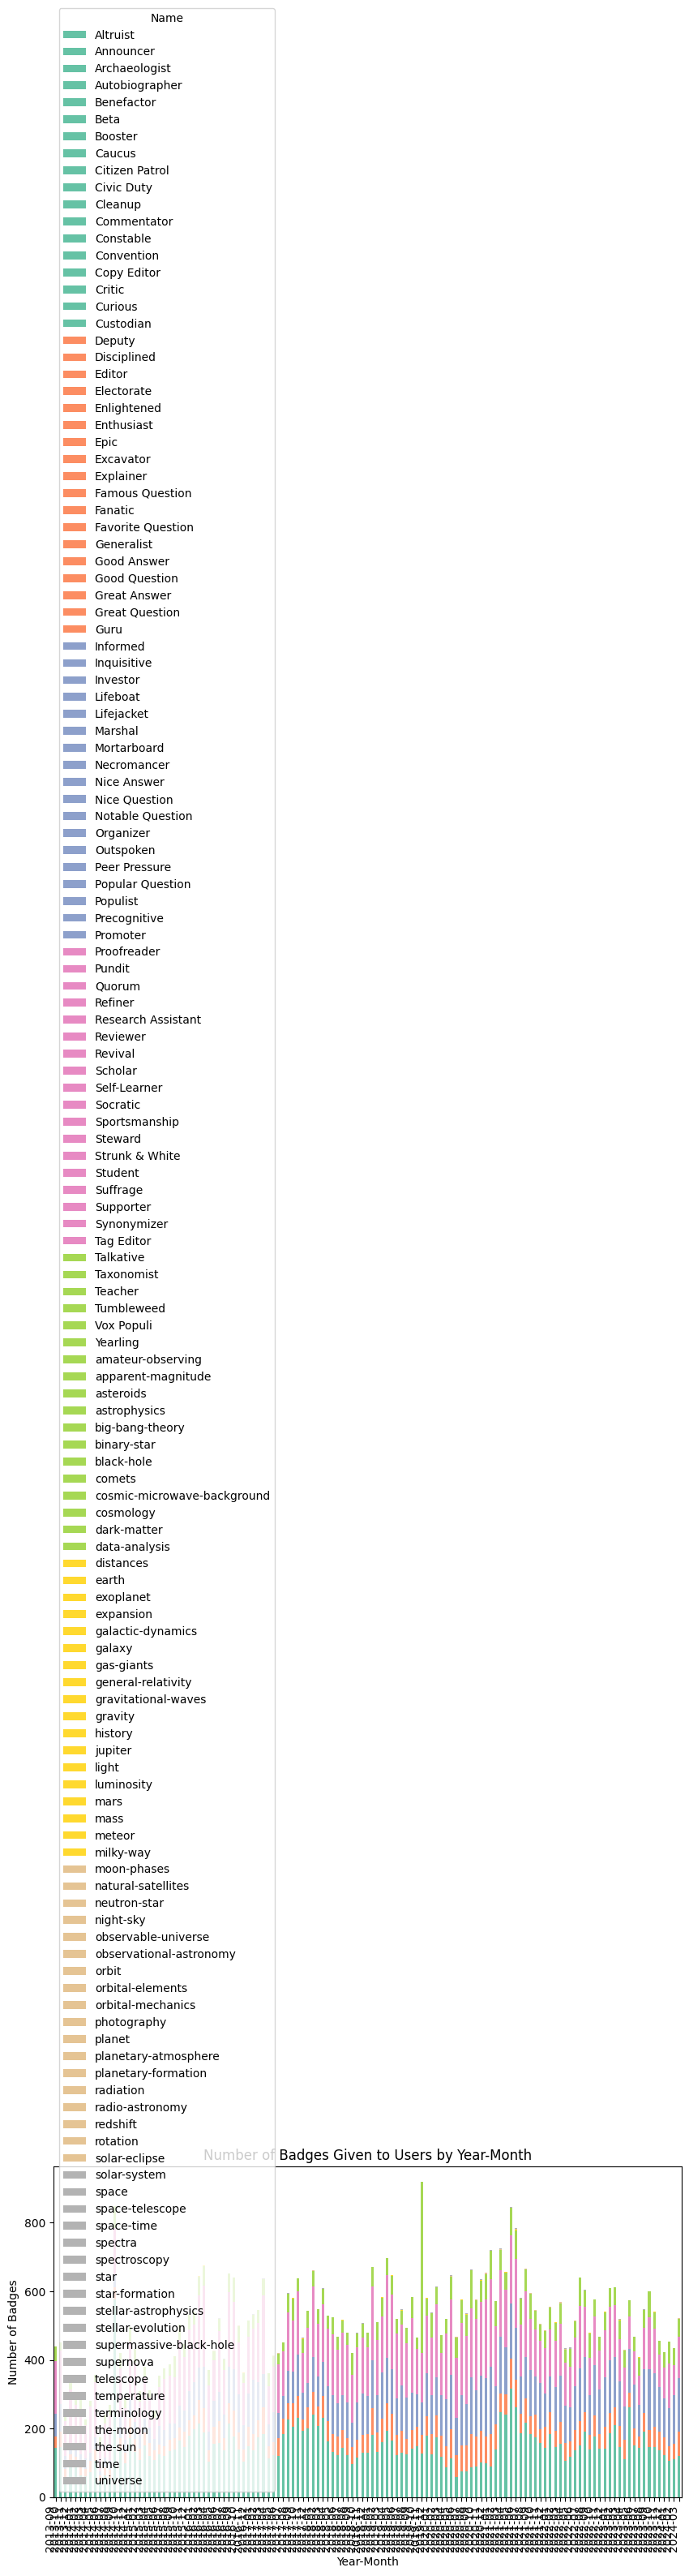

In [14]:
# Extract year and month as a string (e.g., '2021-03')
badges_df['YearMonth'] = badges_df['Date'].dt.to_period('M').dt.to_timestamp()

# Group the data by YearMonth and Badge Name, counting occurrences
badge_counts = badges_df.groupby(['YearMonth', 'Name']).size().unstack(fill_value=0)

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each badge type as a stacked bar
badge_counts.plot(kind='bar', stacked=True, ax=ax, colormap='Set2')

# Get the x-tick positions and format the x-tick labels
ax.set_xticks(ax.get_xticks())  # Ensure we use all the current x-ticks
ax.set_xticklabels([label.strftime('%Y-%m') for label in badge_counts.index], rotation=90, ha='right')

# Labels and title
plt.xlabel('Year-Month')
plt.ylabel('Number of Badges')
plt.title('Number of Badges Given to Users by Year-Month')

plt.subplots_adjust(bottom=0.2)
plt.show()

It might have been a bit too ambitious to create graphs for all badge types across every month, as the x-axis gets hard to read and the legend with all the badge names ends up longer than the graph itself, covering a significant part of information on it. A better approach could have been to focus on the top five badges and display data every six months instead, which would likely make the graph clearer. \
I do like the idea of the legend and the color distinction, but each badge should have had its own color (although in this case, it could have made the graph even harder to read).